In [2]:
# Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install networkx


### The required libraries and packages ###
import networkx as nx
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

protein_list = ['P07108','P61956','P49755','P01034','Q07654','P17900','O00244','Q02487','P98172','P07998','Q86TD4','P05451','P41271','P05060','Q92626','Q2UY09','Q9NS68','Q01974','P37023','Q6PUV4','Q9Y3E2','Q93091','Q01995','P45379','Q9H665','P07478','Q06141','Q8WZ42','Q8IYJ0','P02144','P80188','P84157','P29317','P05413','Q16832','P19438','P10451','P13987','P58062','P46108','P35030','P04118','Q9NXW2','Q03403','Q9Y5H3','P63302','P08590','Q6UY11','P54315','P52799','P01270','Q13790','P07451','P07477','P28325','P07306','P01861','P17538','Q9NZ72','P16860','O15123','P16860','P51858']
proteins = '%0d'.join(protein_list)

print("somalogic_validation list")
genesymbol_protein = pd.read_csv("somalogic_validation_list.csv")
#print(genesymbol_protein.head())
genesymbol_protein_list = genesymbol_protein['gene_name'].to_list()
print(genesymbol_protein_list)

url = 'https://string-db.org/api/tsv/network?identifiers=' + proteins + '&species=9606'
r = requests.get(url)

lines = r.text.split('\n') # pull the text from the response object and split based on new lines
data = [l.split('\t') for l in lines] # split each line into its components based on tabs

print("printing returned data from STRING")
print(data[5])

# convert to dataframe using the first row as the column names; drop empty, final row
df = pd.DataFrame(data[1:-1], columns = data[0]) 
# dataframe with the preferred names of the two proteins and the score of the interaction
interactions_old = df[['preferredName_A', 'preferredName_B', 'score']]  
##print the interaction dataframe
print(interactions_old.head())

print("interactions old list:")
interactions_old_list = list(set(interactions_old['preferredName_A'].tolist() + interactions_old['preferredName_B'].tolist()))
print(interactions_old_list)


G=nx.Graph(name='Protein Interaction Graph')
interactions = np.array(interactions_old)
for i in range(len(interactions)):
    interaction = interactions[i]
    a = interaction[0] # protein a node
    b = interaction[1] # protein b node
    w = float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph


#### read interactions from other papers
##Suhre et al
interactions_suhre = pd.read_csv("Suhre_somascan.txt", delimiter='\t', keep_default_na=False)
print(interactions_suhre.head())

interactions_suhre.columns = ['preferredName_A', 'preferredName_B', 'score']
print(interactions_suhre.head())

###retain only those rows where genes from somascan assay are in final list of proteins from interactions list above
print("retaining interactions from val proteins for Suhre")
#interactions_suhre_mod = interactions_suhre[interactions_suhre.isin(interactions_old_list).any(axis=1)].reset_index(drop=T)
#print(interactions_suhre_mod)
interactions_suhre_mod = interactions_suhre[interactions_suhre.isin(genesymbol_protein_list).any(axis=1)].reset_index(drop=True)
#print(interactions_suhre_mod)



## Somascan assay interactions
interactions_somascan = pd.read_csv("somalogic_protein_interactions.txt", delimiter='\t', keep_default_na="False")
#print(interactions_somascan.head())

interactions_somascan.columns = ['preferredName_A', 'preferredName_B', 'score']
#print(interactions_somascan.head())

###retain only those rows where genes from somascan assay are in final list of proteins from interactions list above
print("retaining interactions from val proteins for somascan")
#interactions_somascan_mod = interactions_somascan[interactions_somascan.isin(interactions_old_list).any(axis=1)].reset_index(drop=T)
#print(interactions_somascan_mod)
interactions_somascan_mod = interactions_somascan[interactions_somascan.isin(genesymbol_protein_list).any(axis=1)].reset_index(drop=True)

## concatenate both dataframes to combine evidence from both. 
print("** merged interactions from evidence")
merged_interactions_from_evidence = pd.concat([interactions_suhre_mod, interactions_somascan_mod]).reset_index(drop=True)
print(merged_interactions_from_evidence.head())

merged_interactions_from_evidence.to_excel("MSSM_Network_limited.xlsx")

G2=nx.Graph(name='Protein Interaction Graph')
interactions2 = np.array(merged_interactions_from_evidence)
#print(interactions2[0])
for i in range(len(interactions2)):
    interaction2 = interactions2[i]
    a = interaction2[0] # protein a node
    b = interaction2[1] # protein b node
    w = float(interaction2[2]) # score as weighted edge where high scores = low weight
    G2.add_weighted_edges_from([(a,b,w)]) # add weighted edge to graph

## Use the Graph with only somalogic interactions.. 
G = G2

somalogic_validation list
['DBI', 'SUMO2', 'TMED10', 'CST3', 'TFF3', 'GM2A', 'ATOX1', 'DSC2', 'EFNB1', 'RNASE1', 'SRL', 'REG1A', 'NBL1', 'CHGB', 'PXDN', 'COL28A1', 'TNFRSF19', 'ROR2', 'ACVRL1', 'CPLX2', 'BOLA1', 'RNASE6', 'TAGLN', 'TNNT2', 'IGFLR1', 'PRSS2', 'REG3A', 'TTN', 'PIANP', 'MB', 'LCN2', 'MXRA7', 'EPHA2', 'FABP3', 'DDR2', 'TNFRSF1A', 'SPP1', 'CD59', 'SPINK7', 'CRK', 'PRSS3', 'CLPS', 'DNAJB12', 'TFF2', 'PCDHGA10', 'SEPW1', 'MYL3', 'DLK2', 'PNLIPRP1', 'EFNB2', 'PTH', 'APOF', 'CA3', 'PRSS1', 'CST5', 'ASGR1', 'IGHG4', 'CTRB1', 'STMN3', 'NPPB', 'ANGPT2', 'HDGF']
printing returned data from STRING
['9606.ENSP00000204961', '9606.ENSP00000351209', 'EFNB1', 'EPHA2', '9606', '0.942', '0', '0', '0', '0.231', '0.148', '0.6', '0.806']
  preferredName_A preferredName_B  score
0           EFNB1           EFNB2  0.933
1           EFNB1           EFNB2  0.933
2           EFNB1             CRK  0.933
3           EFNB1             CRK  0.933
4           EFNB1           EPHA2  0.942
interactions 

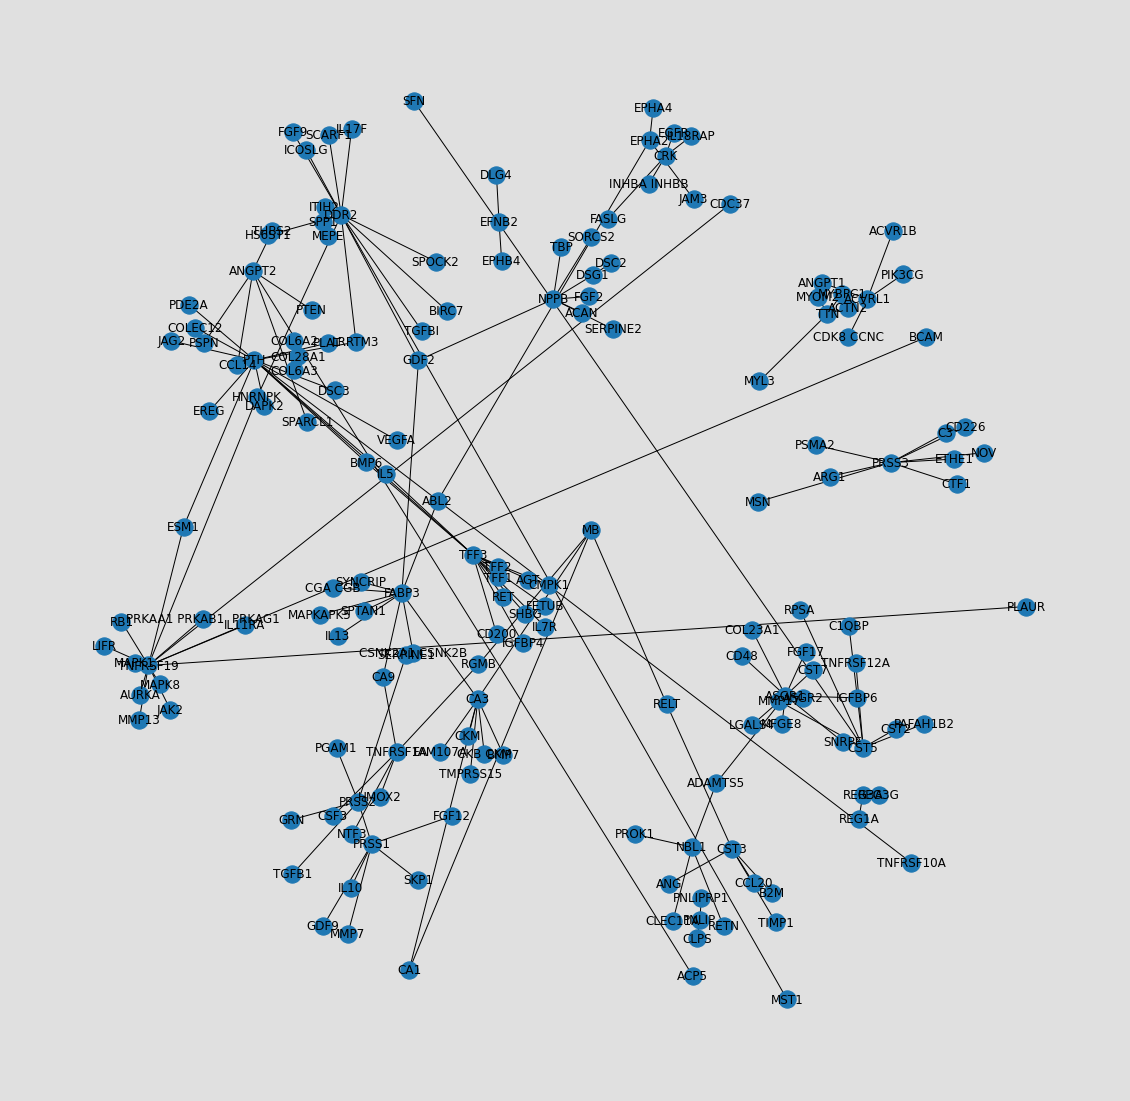

['IL18RAP', 'CRK', 'ACVRL1', 'CDK8 CCNC', 'PRSS1', 'PRSS2', 'DSG1', 'NPPB', 'PIK3CG', 'CCL20', 'CST3', 'HMOX2', 'TNFRSF1A', 'IL11RA', 'TNFRSF19', 'NBL1', 'ADAMTS5', 'RET', 'TFF3', 'CST5', 'CST2', 'INHBA INHBB', 'DDR2', 'HNRNPK', 'ARG1', 'PRSS3', 'FGF2', 'CKM', 'CA3', 'AGT', 'CST7', 'ASGR1', 'FABP3', 'PTH', 'DAPK2', 'MAPK8', 'B2M', 'SPTAN1', 'MAPK1', 'AURKA', 'SYNCRIP', 'ANGPT1', 'MFGE8', 'RGMB', 'CKB CKM', 'ESM1', 'SHBG', 'FGF17', 'MB', 'PROK1', 'CA9', 'PRKAA1 PRKAB1  PRKAG1', 'ACAN', 'FETUB', 'CMPK1', 'ANGPT2', 'THBS2', 'DSC3', 'TNFRSF12A', 'ACP5', 'GDF2', 'CDC37', 'COLEC12', 'JAK2', 'TBP', 'IL7R', 'LIFR', 'RB1', 'BMP6', 'PAFAH1B2', 'FAM107A', 'ETHE1', 'TMPRSS15', 'CLEC11A', 'SERPINE2', 'CSNK2A1 CSNK2B', 'MMP13', 'COL23A1', 'TIMP1', 'JAG2', 'C3', 'LRRTM3', 'IL5', 'SKP1', 'ICOSLG', 'RELT', 'JAM3', 'EPHA2', 'CGA CGB', 'PGAM1', 'CCL14', 'PTEN', 'CD226', 'BCAM', 'NTF3', 'FGF12', 'FGF9', 'CTF1', 'PLAT', 'CD48', 'BMP7', 'PSMA2', 'PDE2A', 'IL10', 'IL13', 'SCARF1', 'IGFBP6', 'RETN', 'MMP7', '

In [15]:
pos = nx.spring_layout(G) # position the nodes using the spring layout
plt.figure(figsize=(20,20),facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

def rescale(l,newmin,newmax):
    #print(l)
    arr = list(l)
    return [(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]


##get list of gene nodes
gene_nodes = G.nodes()
print(gene_nodes)
# use the matplotlib plasma colormap
#graph_colormap = cm.get_cmap('plasma', 13)
#graph_colormap = cm.get_cmap('nipy_spectral', 20)
graph_colormap = cm.get_cmap('Greys', 20)
graph_edges_colormap = cm.get_cmap('plasma', 20)
# node color varies with Degree
c = rescale([G.degree(v) for v in G],0.5,1.5)
#print(c)

print("array with indices for gene_nodes array which corresponds to elements from genesymbol_protein_list which were found in gene_nodes.")
#indices = np.where(np.in1d(gene_nodes, genesymbol_protein_list))[0]
indices = np.where(np.in1d(gene_nodes, genesymbol_protein_list, invert=True))[0]
print(indices)

print("array with invisible node score to replace into the c list")
invisible_node_array = [0.2 for element in range(len(indices))]
#print(invisible_node_array)

### do replace
for (index, invisible_node) in zip(indices, invisible_node_array):
    c[index] = invisible_node

print("c again before graph colormap!!")
#print(c)

c = [graph_colormap(i) for i in c]
print("c after Graph colormap")
#print(c)

# node size varies with betweeness centrality - map to range [10,100] 
bc = nx.betweenness_centrality(G) # betweeness centrality
s =  rescale([v for v in bc.values()],1500,10000)
# edge width shows 1-weight to convert cost back to strength of interaction 
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
# edge color also shows weight
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.3,1.5)
ec = [graph_edges_colormap(i) for i in ec]

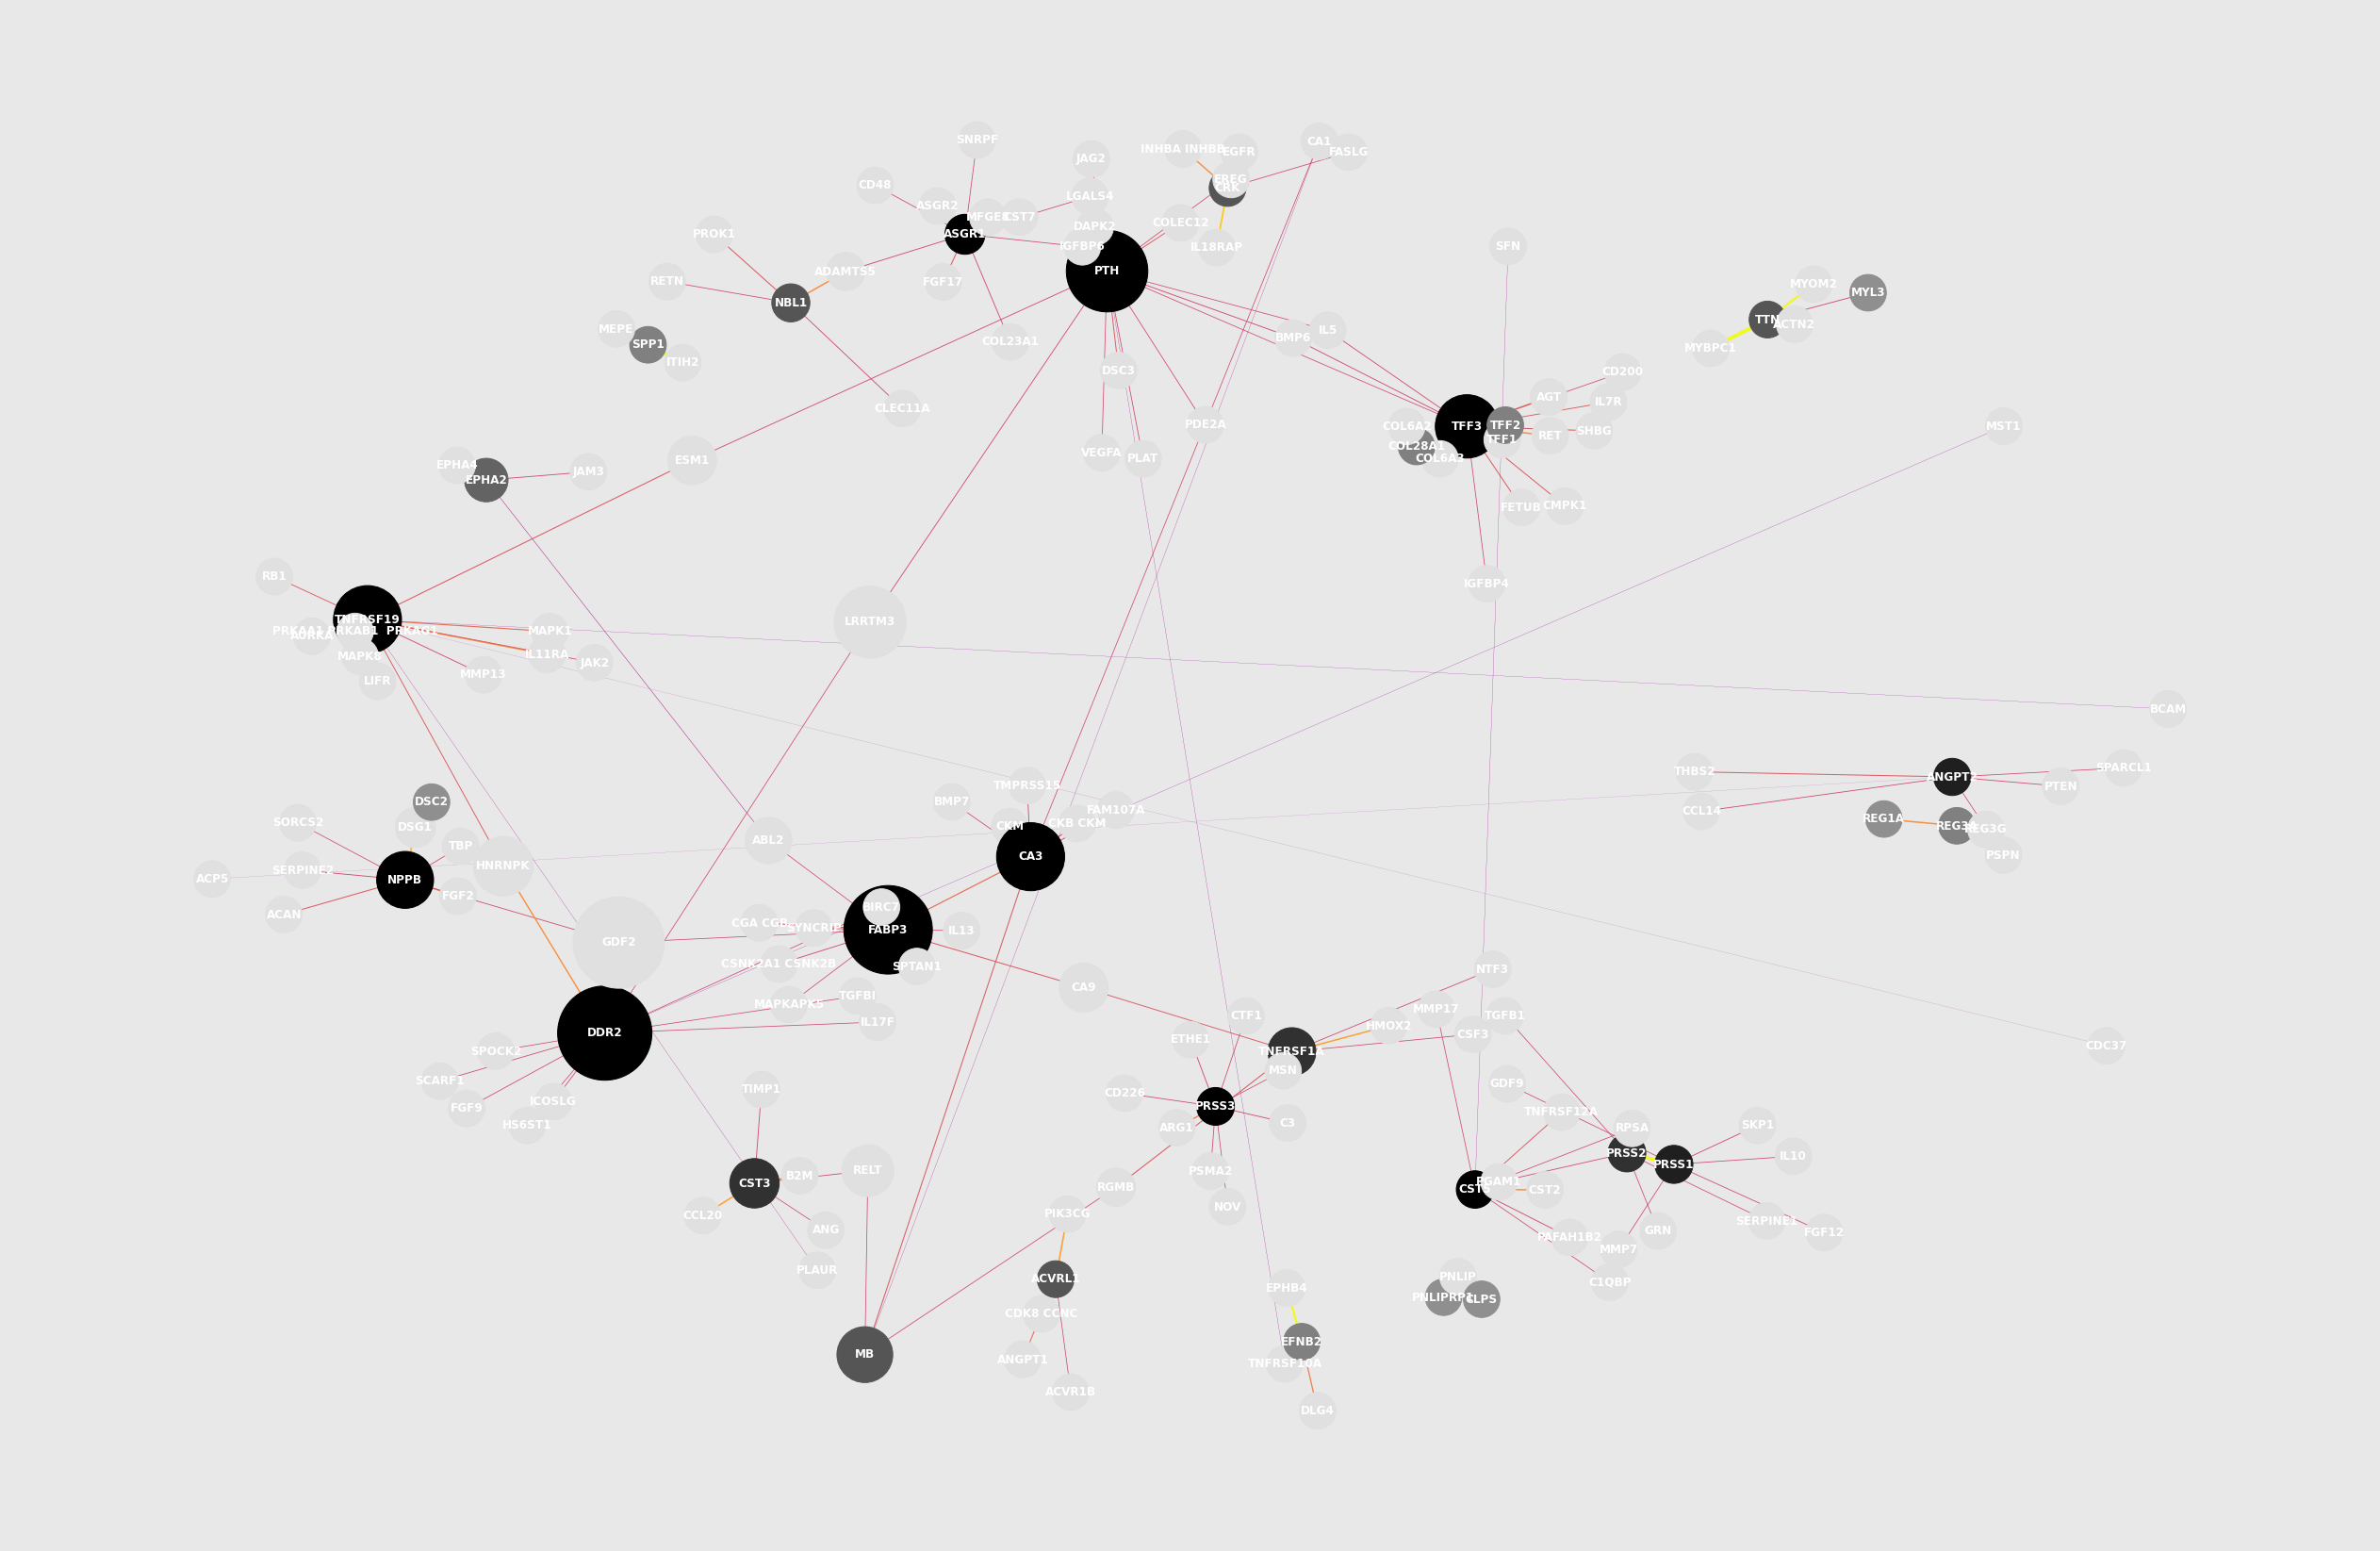

In [17]:
pos = nx.spring_layout(G)

plt.figure(figsize=(45,30),facecolor=[0.7,0.7,0.7,0.3])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s,edge_color=ec,width=ew,
                 font_color='white',font_weight='bold',font_size='12')
#nodes = nx.draw_networkx_nodes(G, pos, edgecolors='black')
pos = nx.spring_layout(G)
plt.axis('off')
plt.show()

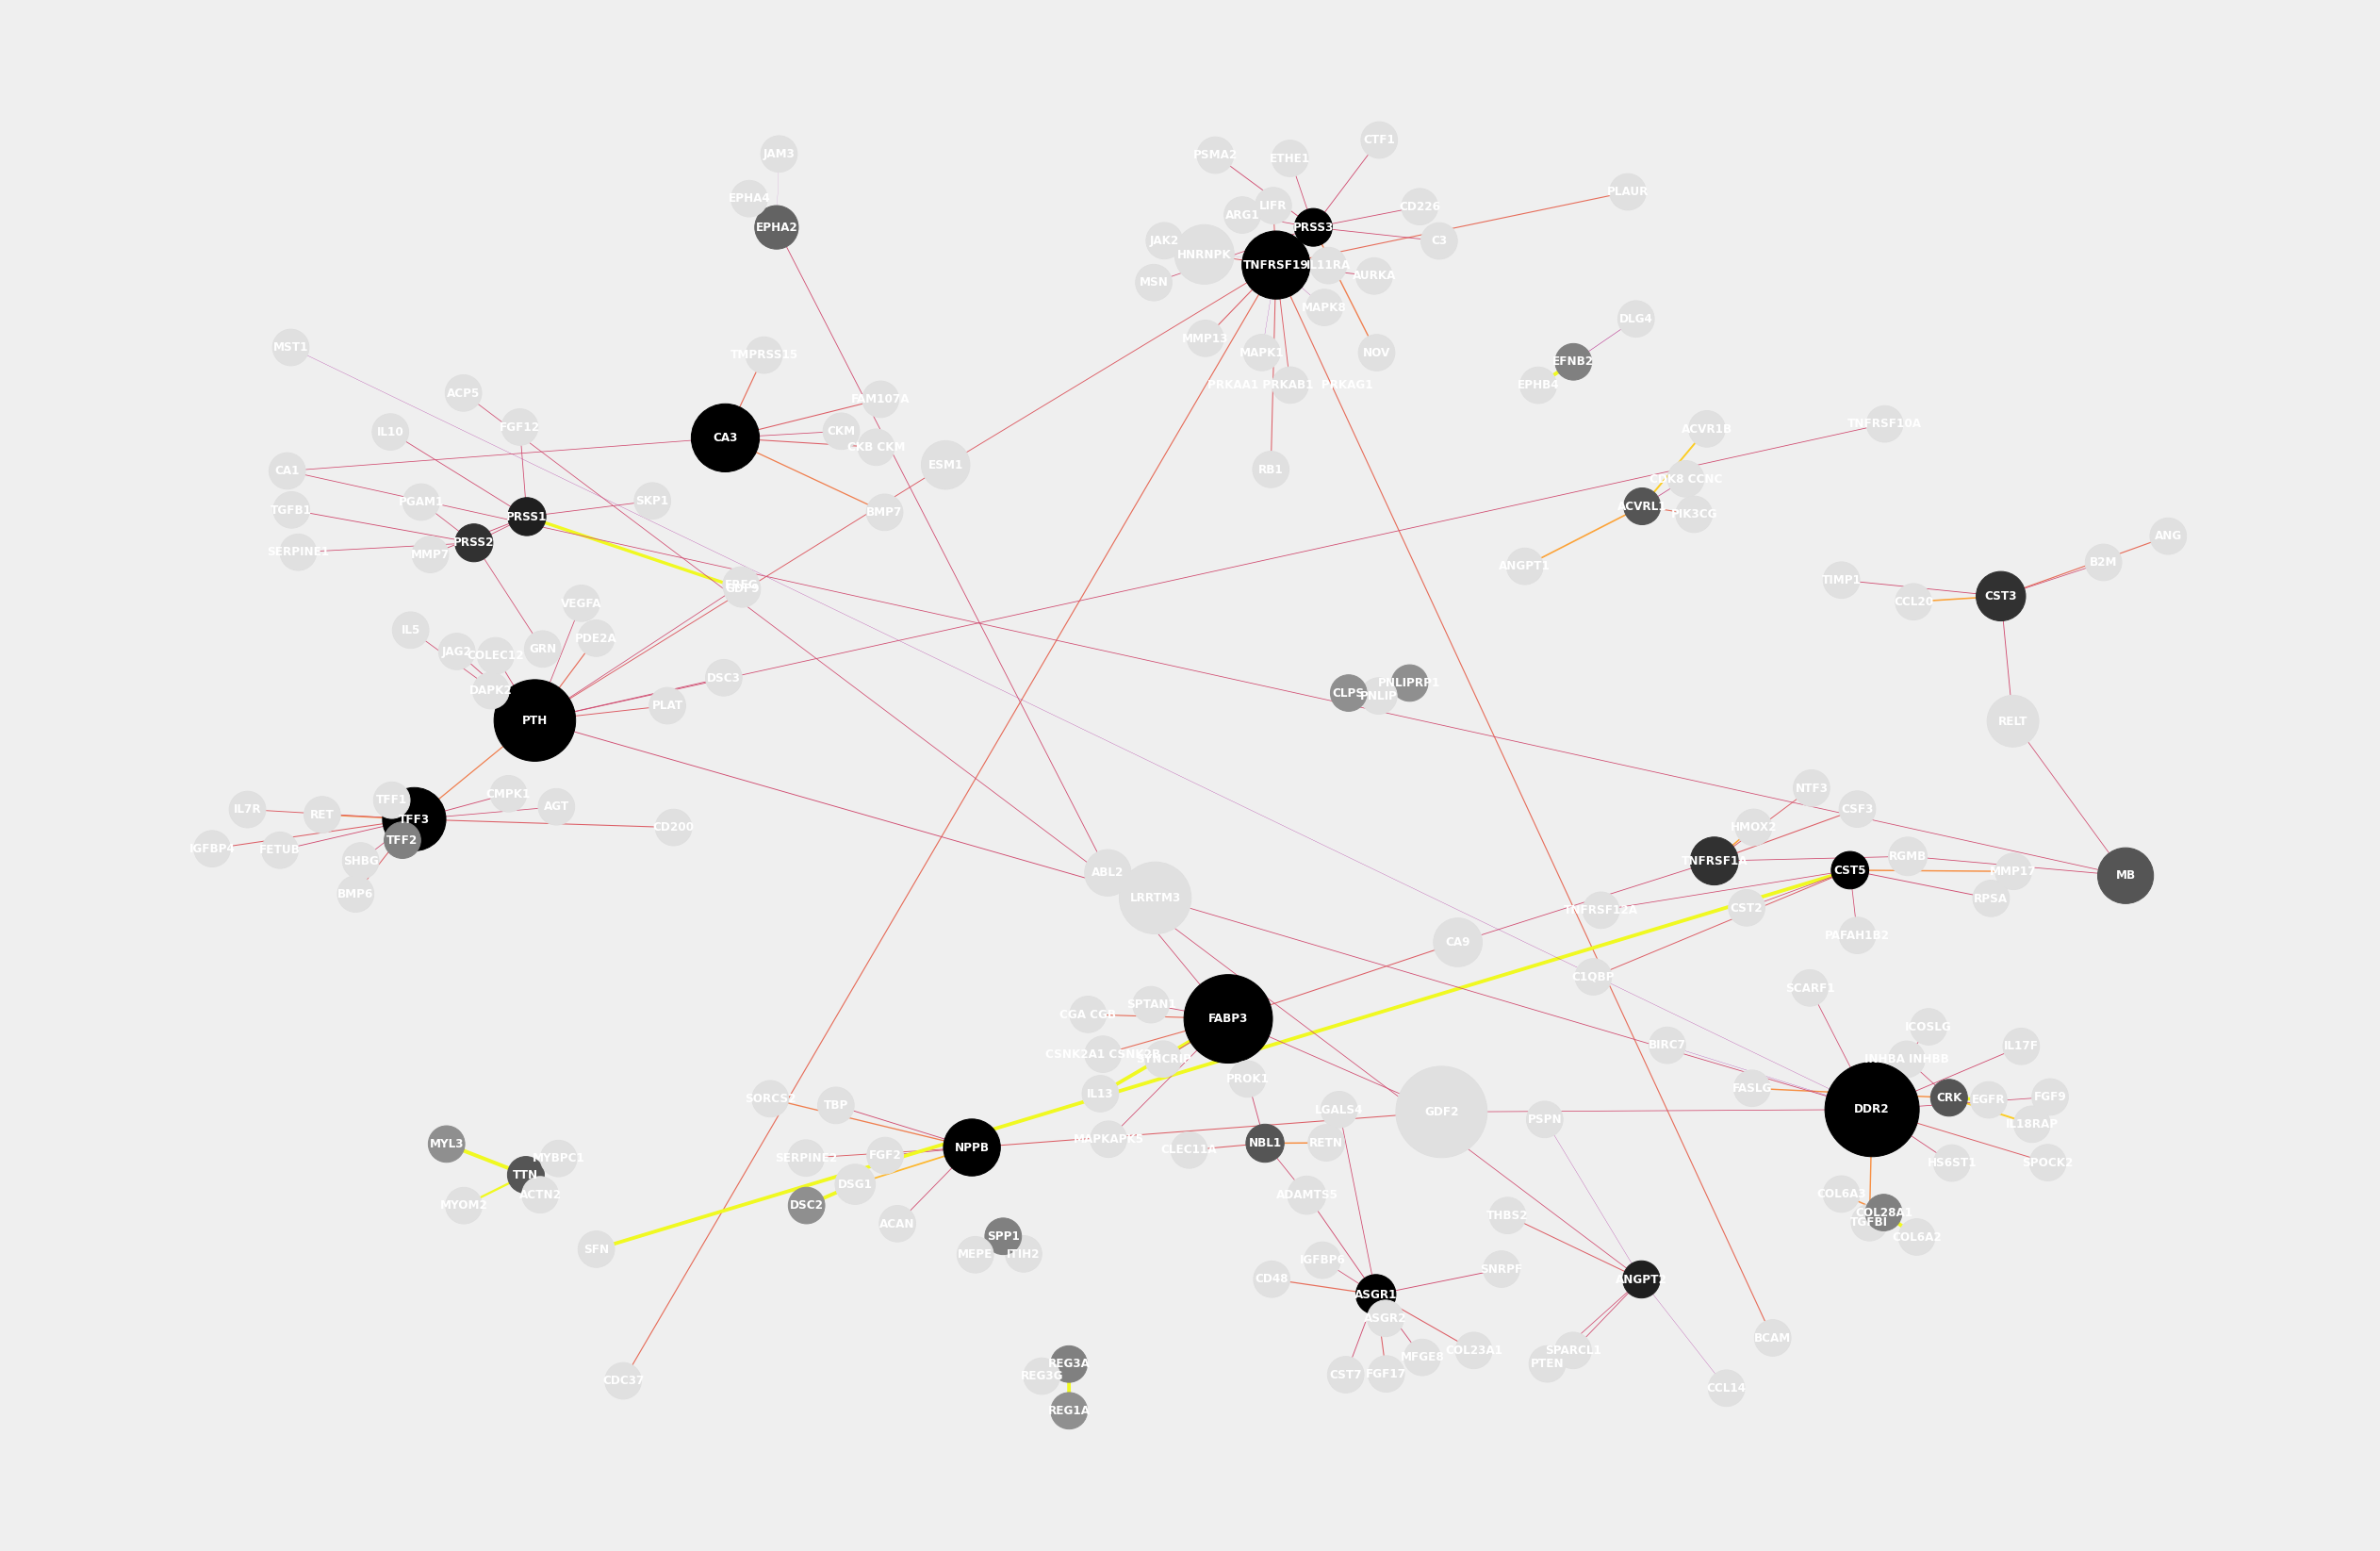

In [26]:
T = nx.minimum_spanning_tree(G)
pos = nx.spring_layout(T)
plt.figure(figsize=(45,30),facecolor=[0.8,0.8,0.8,0.3])
nx.draw_networkx(T, pos=pos, with_labels=True,node_color=c,node_size=s,edge_color=ec,width=ew,
                font_color='white',font_weight='bold',font_size='12')
pos = nx.spring_layout(G)
plt.axis('off')
#plt.show()
plt.savefig('MSSM_PPI_cluster.pdf')